<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.959 · Visualització de dades · A5</p>
<p style="margin: 0; text-align:right;">2021-2 · Màster universitari en Ciència de dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudi d'Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# A5: Estudi de tècniques de visualització de dades

En aquesta activitat l'estudiant haurà de crear tres petites visualitzacions usant tècniques diferents que li seran assignades.

<div class="alert alert-block alert-info">
<strong>Nom i cognoms:</strong> Víctor Iruela Garrido
</div>

## 0. Context i càrrega de llibreries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')
# MODIFICAR D'ACORD A LA RUTA DE LES TEVES CARPETES
%cd /content/drive/MyDrive/Colab Notebooks/visual

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/visual


In [3]:
! pip install pywaffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.1 MB 5.6 MB/s 


## 1. Dot Matrix Chart

Preparem les dades. Les separem pels diferents conjunts que mostrarem. Prèviament, s'han modificat les dades originals per tal de juntar categories d'edad.

In [4]:
df_raw = pd.read_csv("29992_remod.csv", sep = ';')

df_male = df_raw[df_raw['Sexo']=='Hombres'].filter(items=['Edad', 'Total'])
df_female = df_raw[df_raw['Sexo']=='Mujeres'].filter(items=['Edad', 'Total'])

Amb el següent codi implementem la visualització de **Dot Matrix Chart**:

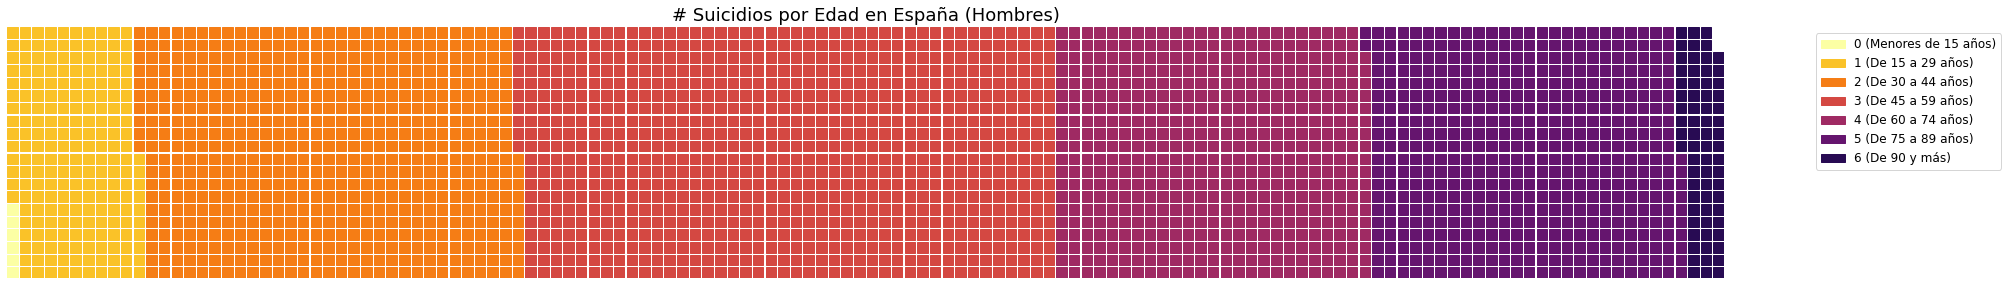

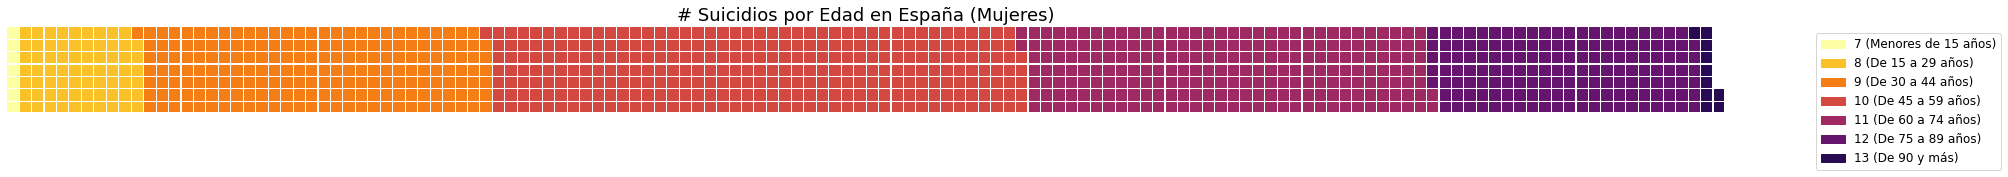

In [5]:
from pywaffle import Waffle

n_categories = df_male.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '111': {
            'values': df_male['Total'],
            'labels': ["{0} ({1})".format(n[0], n[1]) for n in df_male[['Edad', 'Total']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': '# Suicidios por Edad en España (Hombres)', 'loc': 'center', 'fontsize':18}
        },
    },
    rows=20,
    colors=colors,
    figsize=(28, 7)
)

n_categories = df_female.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '111': {
            'values': df_female['Total'],
            'labels': ["{0} ({1})".format(n[0], n[1]) for n in df_female[['Edad', 'Total']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': '# Suicidios por Edad en España (Mujeres)', 'loc': 'center', 'fontsize':18}
        },
    },
    rows=7,
    colors=colors,
    figsize=(28, 7)
)

## 2. Contour Plot

In [6]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [7]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

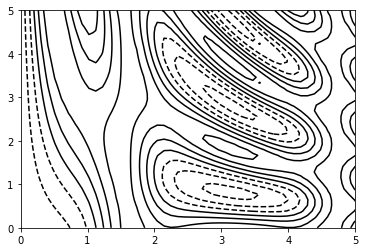

In [8]:
plt.contour(X, Y, Z, colors='black')

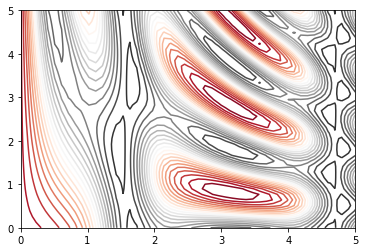

In [9]:
plt.contour(X, Y, Z, 20, cmap='RdGy')

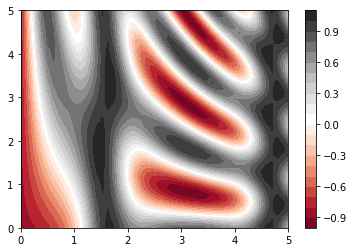

In [10]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()

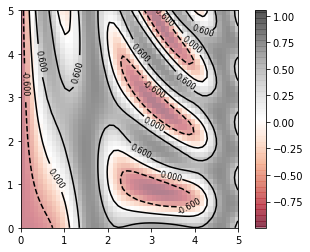

In [11]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar()

**Referències:**
- https://stackoverflow.com/questions/41400136/how-to-do-waffle-charts-in-python-square-piechart
- https://datavizproject.com/data-type/contour-plot/
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html